# Random Numbers and Probability
#### Measuring chances
#### The Dataset used for this analysis can be found in the repo


What's the probability of an event?
P(event)= number of ways event can happen/total number of possible outcomes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
amir_deals = pd.read_csv('amir_deals.csv')

#### Counting the number of deals Amir worked on for each product type and store in counts.

In [3]:
counts = amir_deals['product'].value_counts()
print(counts)

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64


#### Calculating the probability of selecting a deal for the different product types by dividing the counts by the total number of deals Amir worked on. Saving this as probs.

In [4]:
probs = counts / amir_deals.shape[0]
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


#### Setting the random seed to 24 and taking a sample of 5 deals without replacement then storing them as sample_without_replacement.

In [5]:
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
35           36  Product B  Current    Won  8588.35         52
158         159  Product A  Current    Won  4665.88         20
94           95  Product D  Current   Lost  4736.38         73
117         118  Product D  Current   Lost  3416.82         12
138         139  Product C  Current    Won  -539.23         11


#### Taking a sample of 5 deals with replacement and saving as sample_with_replacement.

In [6]:
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
107         108  Product H  Current    Won  9520.58         99
124         125  Product C  Current    Won   482.01         65
127         128  Product B  Current    Won  2070.25          7
26           27  Product B  Current   Lost  5701.70         53
119         120  Product B  Current    Won  1597.44         37


#### Modelling how long Amir will wait for a back-up using a continuous uniform distribution, saving his lowest possible wait time as min_time and his longest possible wait time as max_time. Back-ups happen every 30 minutes.

In [7]:
min_time = 0
max_time = 30

In [8]:
from scipy.stats import uniform

#### Calculating the probability that Amir has to wait less than 5 minutes, and storing in a variable called prob_less_than_5.

In [9]:
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print(prob_less_than_5)

0.16666666666666666


#### Calculating the probability that Amir has to wait more than 5 minutes, and storing in a variable called prob_greater_than_5.

In [10]:
prob_greater_than_5 = 1 - uniform.cdf(5, min_time, max_time)
print(prob_greater_than_5)

0.8333333333333334


#### Calculating the probability that Amir has to wait between 10 and 20 minutes, and storing in a variable called prob_between_10_and_20.

In [11]:
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
print(prob_between_10_and_20)

0.3333333333333333


#### Setting the random seed to 334.

In [12]:
np.random.seed(334)

####  Generating 1000 wait times from the continuous uniform distribution that models Amir's wait time. Saving this as wait_times.

In [14]:
wait_times = uniform.rvs(0, 30, size=1000)
print(wait_times)

[18.02470643 23.519618    9.88490103  2.4651489  15.5597737   6.49165715
  7.56474939 26.04453623 14.11082999  7.75180706 16.47948828 22.9018111
 14.78686265  8.93936027 10.30296128  9.27696058 22.19806281 13.28179067
 21.86050864  2.55629955 17.06257675  9.48091148 20.85865084  9.72028371
 22.63229097 21.57900892 23.935431   17.36008651 26.80050866  9.38708245
  2.97794546 27.23209213 23.62487867 10.08493037 17.75084196  4.4576378
 26.30385665 13.6938704   1.95697735 26.58726202  5.73267157 21.82148011
  9.54225359 10.3007437  20.37353633 13.75034303  4.66529527  4.96403209
 22.7626545  16.69820401  4.85157792 12.83944291 25.11482746  3.28931416
 12.94581875  4.41119388 11.90428607  3.15563509 13.03751773 19.97053665
 19.79847703 23.62192831 13.50572327  9.3761087   3.17705873 18.15924959
  1.01499147  9.96929131 27.3871973  24.98045919 26.75357257 28.113278
 26.02448382 28.24988311 18.72955363 26.57684498 23.35648609  5.27772201
 27.00030546 14.01499899 12.42080186 19.2843056  13.806

#### Creating a histogram of the simulated wait times and showing the plot.

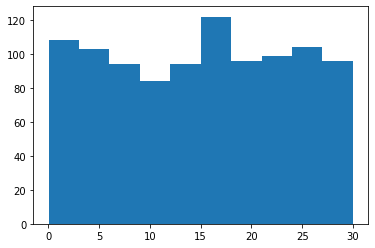

In [15]:
plt.hist(wait_times)
plt.show()

In [16]:
from scipy.stats import binom

#### Setting random seed to 10

In [17]:
np.random.seed(10)

#### Simulating 1 deal worked on by Amir, who wins 30% of the deals he works on.

In [18]:
print(binom.rvs(1, 0.3, size=1))

[1]


#### Simulating a typical week of Amir's deals, or one week of 3 deals.

In [19]:
print(binom.rvs(3, 0.3, size=1))

[0]


#### Simulating a year's worth of Amir's deals, or 52 weeks of 3 deals each, and storing in deals. Printing the mean number of deals he won per week.


In [20]:
deals = binom.rvs(3, 0.3, size=52)
print(np.mean(deals))

0.8461538461538461


#### Showing the probability that Amir closes all 3 deals in a week and saving this as prob_3.

In [21]:
prob_3 = binom.pmf(3, 3, 0.3)
print(prob_3)

0.026999999999999982


#### Showing the probability that Amir closes 1 or fewer deals in a week and saving this as prob_less_than_or_equal_1.

In [22]:
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)
print(prob_less_than_or_equal_1)

0.7839999999999999


#### Showing the probability that Amir closes more than 1 deal and saving this as prob_greater_than_1.

In [23]:
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)
print(prob_greater_than_1)

0.21600000000000008


#### Calculating the expected number of sales out of the 3 he works on that Amir will win each week if he maintains his 30% win rate.

In [24]:
won_30pct = 3 * 0.3
print(won_30pct)

0.8999999999999999


#### Calculating the expected number of sales out of the 3 he works on that he'll win if his win rate drops to 25%.

In [25]:
won_25pct = 3 * 0.25
print(won_25pct)

0.75


#### Calculating the expected number of sales out of the 3 he works on that he'll win if his win rate rises to 35%.

In [26]:
won_35pct = 3 * 0.35
print(won_35pct)

1.0499999999999998
